# Simple Evolutionary Exploration  Walkthrough

This notebook contains instructions on how to use the SEE module, along with several examples. These instructions will cover the following parts: 
* [Import Image Files](#Import_Image_Files)
* [Manual Search](#Manual_Search)
* [Genetic Algorithm Search](#Genetic_Algorithm_Search)
* [Reading the Results](#Reading_the_Results)

These examples use the Jupyter widgets to make it interactive and easier to use and learn.

----
<a name="Import_Image_Files"></a>

## Import Image Files

First import the following packages:

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import imageio
from see import Segmentors
from see import JupyterGUI

Pick an image from the example folder.

Dropdown(description='Choose image:', index=8, options=(WindowsPath('Image_data/Examples/a_walk_in_the_park.jp…

import imageio
img = imageio.imread('Image_data\Examples\mz.jpg')
gmask = imageio.imread('Image_data\Examples\mz_GT.png')


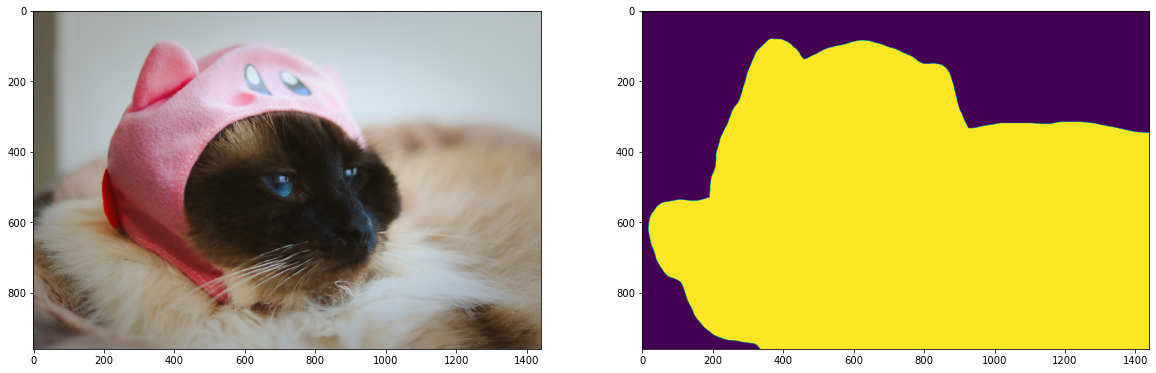

In [3]:
data = JupyterGUI.pickimage('Image_data/Examples/')

# Select ColorSpace

In [4]:
colorspace = JupyterGUI.colorwidget(data.img, paramlist=None)

seg.params = {'colorspace': 'RGB', 'multichannel': True, 'channel': 2}


GridBox(children=(SelectionSlider(continuous_update=False, description='colorspace', options=('RGB', 'HSV', 'R…

Output()

# Select ColorSpace

In [5]:
colorspace = JupyterGUI.colorwidget(data.img, paramlist=None)

seg.params = {'colorspace': 'RGB', 'multichannel': True, 'channel': 2}


GridBox(children=(SelectionSlider(continuous_update=False, description='colorspace', options=('RGB', 'HSV', 'R…

Output()

----
<a name="Manual_Search"></a>

## Manual Search

Manual searching of parameters can easily be done using the provided GUI. Pre-established parameters can be put into the widget, or the parameter values can be changed using the sliders. To change the algorithm, simply change the `alg` input. For a list of available inputs print `Segmentors.algorithmspace`


In [6]:
from see.Segmentors import segmentor

alg = JupyterGUI.picksegment(list(segmentor.algorithmspace.keys()))

Dropdown(description='Choose Algorithm:', options=('ColorThreshold', 'Felzenszwalb', 'Slic', 'SlicO', 'QuickSh…

ColorThreshold.

    Peform Color Thresholding segmentation algorithm. Segments parts of the image
    based on the numerical values for the respective channel.

    Parameters:
    mulitchannel - (multichannel) - bool, Whether the image is 2D or 3D
    colorspace - (colorspace) Select the colorspace [‘RGB’, ‘HSV’, ‘RGB CIE’, ‘XYZ’, ‘YUV’, ‘YIQ’, ‘YPbPr’, ‘YCbCr’, ‘YDbDr’]
    channel - (channel) color chanel (0:R/H/L 1:G/S/A, 2:B/V/B)
    ch0_mn - (alpha1) - minimum thresholding value for channel 0
    ch0_mx - (alpha2) - maximum thresholding value for channel 0
    ch1_mn - (beta1) - minimum thresholding value for channel 1
    ch1_mx - (beta2) - maximum thresholding value for channel 1
    ch2_mn - (gamma1) - minimum thresholding value for channel 2
    ch2_mx - (gamma2) - maximum thresholding value for channel 2

    Note: a colorspace of 'HSV' and a channel of 2 is a grayscale image.

    Typically any pixel between my_mn and my_mx are true. Other pixels are false.

    if my_mn >

In [7]:
### Example of input for params
params = JupyterGUI.segmentwidget(data.img, params = None, alg = alg.value)

GridBox(children=(SelectionSlider(continuous_update=False, description='alpha1', options=(0.0, 0.00390625, 0.0…

Output()

----
<a name="Genetic_Algorithm_Search"></a>

## Genetic Algorithm Search

First import image files, as well as the following packages:

In [28]:
from see.Segmentors import segmentor
from see.ColorSpace import colorspace
from see.Workflow import workflow
from see.Segment_Fitness import segment_fitness
from see import base_classes, GeneticSearch
#define algo work flow
workflow.addalgos([colorspace, segmentor, segment_fitness])

To run the genetic algorithm, we need to initialize an instance of an evolver. The original image and ground truth segmentation image are inputs to it, along with an integer value for population size. This value sets how many indivudals are in our population. For this example, we'll set this number to be equal to 10.

In [9]:
mydata = base_classes.pipedata()
mydata.img = data.img
mydata.gmask = data.gmask
#def geneticsearch
my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=10)

Now that the evolver has been initialized, we can run the genetic algorithm for a specified number of generations (or iterations). Here we will set this number equal to 5.

In [10]:
# warnings may appear when this runs
#population -- Resulting population after ngen generations.
population = my_evolver.run(ngen=5) #5 generation
#fitness 1 is worse , 0 is good

Initializing a new random population
Generation 0/5 of population size 10
<class 'see.Workflow.workflow'> parameters: 
	colorspace = XYZ
	multichannel = True
	channel = 2
	algorithm = ColorThreshold
	alpha1 = 0.97265625
	alpha2 = 0.75390625
	beta1 = 0.01171875
	beta2 = 0.6640625
	gamma1 = 0.75
	gamma2 = 0.8828125
	n_segments = 0
	max_iter = 4

Time: 2.173 s
fitness=1

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YIQ
	multichannel = False
	channel = 2
	algorithm = ColorThreshold
	alpha1 = 0.4609375
	alpha2 = 0.11328125
	beta1 = 0.27734375
	beta2 = 0.35546875
	gamma1 = 0.0
	gamma2 = 0.8984375
	n_segments = 4
	max_iter = 10

Time: 1.918 s
fitness=1

<class 'see.Workflow.workflow'> parameters: 
	colorspace = XYZ
	multichannel = True
	channel = 1
	algorithm = Felzenszwalb
	alpha1 = 0.28515625
	alpha2 = 0.796875
	beta1 = 0.671875
	beta2 = 0.73828125
	gamma1 = 0.859375
	gamma2 = 0.875
	n_segments = 6
	max_iter = 11

Time: 5.97 s
fitness=0.8978743813475436

<class 'see.Workflow.w

S:\SEE\see-segment\see\Segmentors.py:387: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  output = skimage.segmentation.slic(


Time: 2.377 s
fitness=1.0067881684400715

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YPbPr
	multichannel = True
	channel = 2
	algorithm = QuickShift
	alpha1 = 0.7890625
	alpha2 = 0.25390625
	beta1 = 0.70703125
	beta2 = 0.78515625
	gamma1 = 0.5390625
	gamma2 = 0.14453125
	n_segments = 8
	max_iter = 9

Time: 3384.318 s
fitness=1.0041928166759866

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YCbCr
	multichannel = True
	channel = 2
	algorithm = Watershed
	alpha1 = 0.60546875
	alpha2 = 0.1875
	beta1 = 0.40625
	beta2 = 0.56640625
	gamma1 = 0.21484375
	gamma2 = 0.0390625
	n_segments = 8
	max_iter = 8

Time: 5.315 s
fitness=0.9999885751885813

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YCbCr
	multichannel = False
	channel = 1
	algorithm = Felzenszwalb
	alpha1 = 0.328125
	alpha2 = 0.34765625
	beta1 = 0.984375
	beta2 = 0.9765625
	gamma1 = 0.50390625
	gamma2 = 0.5
	n_segments = 6
	max_iter = 3

Time: 5.016 s
fitness=0.9771273306596621

<class 'see.Wor

S:\see\see-segment\envs\lib\site-packages\skimage\segmentation\morphsnakes.py:106: FutureWarning: circle_level_set is deprecated in favor of disk_level_set.circle_level_set will be removed in version 0.19
  res = circle_level_set(image_shape)


Time: 3.0 s
fitness=1

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YPbPr
	multichannel = False
	channel = 0
	algorithm = MorphGeodesicActiveContour
	alpha1 = 0.4140625
	alpha2 = 0.44921875
	beta1 = 0.27734375
	beta2 = 0.78125
	gamma1 = 0.32421875
	gamma2 = 0.2109375
	n_segments = 7
	max_iter = 19

Time: 5.994 s
fitness=1

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YPbPr
	multichannel = True
	channel = 0
	algorithm = Morphological_Chan_Vese
	alpha1 = 0.609375
	alpha2 = 0.12109375
	beta1 = 0.8203125
	beta2 = 0.26171875
	gamma1 = 0.68359375
	gamma2 = 0.5078125
	n_segments = 1
	max_iter = 17

Time: 8.53 s
fitness=1

<class 'see.Workflow.workflow'> parameters: 
	colorspace = XYZ
	multichannel = True
	channel = 1
	algorithm = Felzenszwalb
	alpha1 = 0.28515625
	alpha2 = 0.796875
	beta1 = 0.671875
	beta2 = 0.73828125
	gamma1 = 0.859375
	gamma2 = 0.875
	n_segments = 6
	max_iter = 11

Time: 6.722 s
fitness=0.8978743813475436

<class 'see.Workflow.workflow'> paramet

Time: 112.518 s
fitness=0.5881689510563755

<class 'see.Workflow.workflow'> parameters: 
	colorspace = XYZ
	multichannel = False
	channel = 1
	algorithm = Felzenszwalb
	alpha1 = 0.328125
	alpha2 = 0.34765625
	beta1 = 0.10546875
	beta2 = 0.9765625
	gamma1 = 0.50390625
	gamma2 = 0.5078125
	n_segments = 6
	max_iter = 3

Time: 5.621 s
fitness=0.9406875990107169

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YCbCr
	multichannel = False
	channel = 2
	algorithm = QuickShift
	alpha1 = 0.31640625
	alpha2 = 0.2890625
	beta1 = 0.984375
	beta2 = 0.078125
	gamma1 = 0.32421875
	gamma2 = 0.5
	n_segments = 7
	max_iter = 4

Time: 5435.665 s
fitness=1

<class 'see.Workflow.workflow'> parameters: 
	colorspace = XYZ
	multichannel = False
	channel = 1
	algorithm = Felzenszwalb
	alpha1 = 0.328125
	alpha2 = 0.34765625
	beta1 = 0.984375
	beta2 = 0.73828125
	gamma1 = 0.859375
	gamma2 = 0.875
	n_segments = 6
	max_iter = 3

Time: 5.163 s
fitness=0.820584683044699

<class 'see.Workflow.workflow'> par

Time: 4.152 s
fitness=0.9999467434400667

<class 'see.Workflow.workflow'> parameters: 
	colorspace = XYZ
	multichannel = False
	channel = 2
	algorithm = Felzenszwalb
	alpha1 = 0.328125
	alpha2 = 0.34765625
	beta1 = 0.10546875
	beta2 = 0.078125
	gamma1 = 0.32421875
	gamma2 = 0.875
	n_segments = 7
	max_iter = 3

Time: 4.978 s
fitness=0.9717339223280036

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YCbCr
	multichannel = False
	channel = 1
	algorithm = QuickShift
	alpha1 = 0.31640625
	alpha2 = 0.2890625
	beta1 = 0.984375
	beta2 = 0.73828125
	gamma1 = 0.859375
	gamma2 = 0.5078125
	n_segments = 6
	max_iter = 4

Time: 5307.279 s
fitness=1.0063073481899647

#BEST [0.13652921828966982,  ['YUV', False, 0, 'Felzenszwalb', 0.1875, 0.921875, 0.74609375, 0.296875, 0.609375, 0.46875, 8, 10]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
usin

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YUV
	multichannel = False
	channel = 0
	algorithm = Felzenszwalb
	alpha1 = 0.1875
	alpha2 = 0.921875
	beta1 = 0.74609375
	beta2 = 0.296875
	gamma1 = 0.609375
	gamma2 = 0.46875
	n_segments = 8
	max_iter = 10

Time: 4.706 s
fitness=0.13652921828966982


#BEST [0.13652921828966982,  ['YUV', False, 0, 'Felzenszwalb', 0.1875, 0.921875, 0.74609375, 0.296875, 0.609375, 0.46875, 8, 10]]

----
<a name="Reading_the_Results"></a>

## Reading the Results

After the genetic algorithm is complete, we can retrieve the individuals that resulted in the lowest (best) fitness values by printing `my_evolver.hof`. These individuals are sorted according to fitness value, so to get the overal best individual, we can simply look at the first individual in the list. 

In [11]:
params = my_evolver.hof[0]

print('Best Individual:\n', params)

Best Individual:
 ['YUV', False, 0, 'Felzenszwalb', 0.1875, 0.921875, 0.74609375, 0.296875, 0.609375, 0.46875, 8, 10]


We can see the mask this individual generates by evaluating it, then plotting the result:

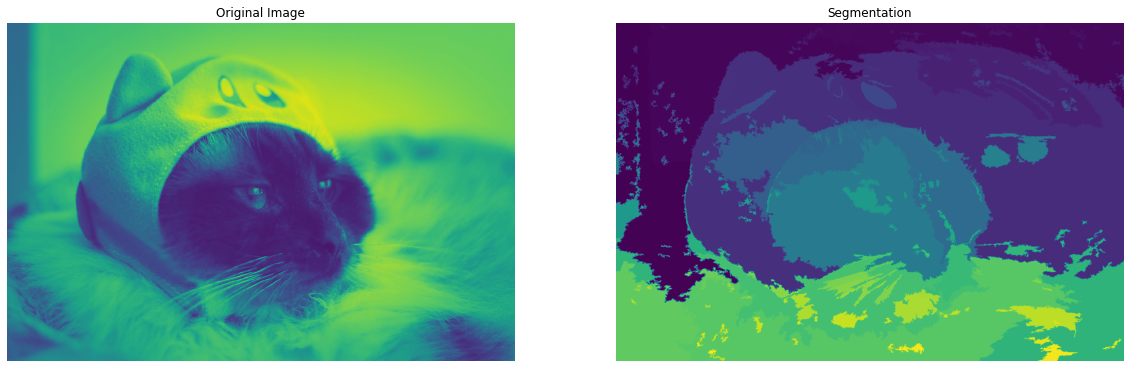

In [31]:
#['YUV', False, 0, 'Felzenszwalb', 0.1875, 0.921875, 0.74609375, 0.296875, 0.609375, 0.46875, 8, 10]
#------------------------------------
#this line is the original code
#seg = Segmentors.algoFromParams(params)
# no attribute  .algoFromParams
#------------------------------------
#what if the class is called wrong: 
#seg = segmentor(param)
# KeyError: 'YUV'
#------------------------------------

#use workflow instead, to create a workf class
#since the parameter input might produce error, use the workflow's parameter to make a seg object
workf = workflow(params)
seg = segmentor(workf.params)
mask = seg.evaluate(data.img)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(data.img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(mask)
plt.title("Segmentation")
plt.axis('off')

plt.tight_layout
plt.show()

In [ ]:
from see.Segment_Fitness import segment_fitness

We can also use `FitnessFunction` to calculate the final fitness value for this algorithm:

In [37]:
#This is original code
#print('Fitness Value: ', Segmentors.FitnessFunction(mask, data.mask)[0])
#AttributeError: module 'see.Segmentors' has no attribute 'FitnessFunction'
#------------------------------------
print('Fitness Value: ', segment_fitness().evaluate(data.mask, data.gmask)[0])

Fitness Value:  0.13652921828966982


If this value is satisfactory, we can then get usable code to run this algorithm anywhere, including outside this notebook. The `print_best_algorithm_code` function does this using the given individual:

In [38]:
ex = Segmentors.print_best_algorithm_code(my_evolver.hof[0])

AttributeError: module 'see.Segmentors' has no attribute 'print_best_algorithm_code'

With this code, make sure to import skimage, along with any input images this algorithm will be applied to.